# Fandango and their inflating ratings

It is a known case that [Fandango](https://www.fandango.com/), an online movie rating aggregator, was inflating the ratings of their movies. Walt Hickley posted an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) about this.

The goal of this project is to analayze more recent ratings data to determine if there was a chjange in their system.

# Understanding the data

In [257]:
# installing pandas and requests at the same time
# !pip install pandas requests

In [258]:
# importing the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import tabulate
import seaborn as sns
import requests
from IPython.display import display
%matplotlib inline

data_1 = requests.get("https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv")
with open("fandango_score_comparison.csv", "w+") as fandango_score_comparison:
    fandango_score_comparison.write(data_1.text)
    
data_2 = requests.get("https://raw.githubusercontent.com/mircealex/Movie_ratings_2016_17/master/movie_ratings_16_17.csv")
with open ("movie_ratings_16_17.csv", "w+") as movie_ratings_16_17:
    movie_ratings_16_17.write(data_2.text)

fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv") 
fandango_movie_ratings = pd.read_csv("movie_ratings_16_17.csv")

In [259]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [260]:
fandango_movie_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [261]:
# isolating the column data related only to Fandango
# Setting copy to avoid the erroe SettingWithCopyWarning
fandango_previous = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = fandango_movie_ratings[['movie', 'year', 'fandango']].copy()

In [262]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [263]:
fandango_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [264]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [265]:
fandango_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


The goal of the analysis is to deteremine whether there has been a change in Fandango's movie rating system after the publication of that article. Therefore, the population of interest for this goal is made of all the movie ratings on Fandango's website regardless of the release year.

The two data samples that we have have already been sampled, but before we proceed with anything, we need to make sure that the data samples are representative. Otherwise, the sampling error will be big and, therefore, we will reach eronate conclusions.

The first [sample](https://github.com/fivethirtyeight/data/tree/master/fandango) data that was collected for the article, says that it was sampled like this:
- the movie must have had at least 30 fan reviews on Fandango (at the moment when the data was pulled)
- the movie must have had tickets on sale that year (2015)

The sampling done is definetetly not a random one because any movie that was on Fandango's platform and did not meet any othe criteria above did not meet the conditions to be selected for the analysis. I am pretty sure that were good movies in that year that did not have any tickets on sale or had under 30 fan reviews that could have skewed the analysis. To conclude, the sample is very likely to not be representative to the study because it is subject to *temporal trends* i.e.: the movies in 2015 compared with movies in other years could be worse or better compared to other years.


The other [sample](https://github.com/mircealex/Movie_ratings_2016_17):
- the movie was released in 2016 or later
- it mentions 'a significant amount of votes' but does not mention how many

With this in mine, we can conclude that this sample is also not very representative to our study because it is also subject to temporal trends. 

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called **purposive sampling** (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for the research we are about to do.

## Changing the goal of the analysis

Given the data stated above, we would have to tweak the goal in order to continue the analysis and naturally place some limitations on it. It is close-to-imposssible to collect new sample data that is previous to the analysis made by Hickey.

It can be observed that both platforms have almost the same selection of populat movies and compile ratings from different review sources (Rotten Tomatoes, Metacritic, iMDB). We will choose to focus on Fandango's ratings for popular movies in 2015 and popular movies in 2016. In this way, **we can see if they indeed decided to fix their rounding system bug.**

This makes the new goal more suitable for the analysis.

## Isolating the samples we need 

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

Before, we proceed we need to define what exactly "popular" means in this context. In this case, we will use the benchmark that a movie is popular if it has at least 30 fan reviews on Fandango.

First, let's check if all the movies from the dataset from `fandango_ previous` have over 30 fan reviews

In [266]:
len(fandango_previous[fandango_previous['Fandango_votes']>=30]) == len(fandango_previous)

True

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [267]:
fandango_after.sample(10, random_state= 100)

,movie,year,fandango
117,Morgan,2016,3.5
163,The Boss,2016,3.5
145,Skiptrace,2016,3.5
134,Pride and Prejudice and Zombies,2016,4.0
112,Misconduct,2016,3.0
74,I.T.,2016,3.5
126,Office Christmas Party,2016,3.5
65,Hacksaw Ridge,2016,4.5
181,The Infiltrator,2016,4.0
110,Mike and Dave Need Wedding Dates,2016,4.0


NOTE!: At the moment of writing this project (March 2022), I did not find a way to verify the total number of user reviews for heach of the movies above. This might have been replaced with a new system where it shows only reviews of users that made a verified ticket purchase and rated the video 3.5 or higher.

I will go on with the assumption that all the movies in the generated sample have over 30 fan reviews.

I will proceed now to isolate the data in such ways that I will have separate dataframes for movies released in 2015 and 2016

In [268]:
fandango_previous['FILM'].head(3)

0    Avengers: Age of Ultron (2015)
1                 Cinderella (2015)
2                    Ant-Man (2015)
Name: FILM, dtype: object

In [269]:
# extracting the year from the film name and creating a column with
fandango_previous['year'] = fandango_previous['FILM'].str[-5:-1]

#seeing how many movies were released in 2015
fandango_previous['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [270]:
# create a frequency distribution table
round(fandango_previous['year'].value_counts(normalize= True) * 100)

2015    88.0
2014    12.0
Name: year, dtype: float64

In [271]:
fandango_2015 = fandango_previous[fandango_previous['year'] == '2015'].copy()
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [272]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [273]:
round(fandango_after['year'].value_counts(normalize=True)*100)

2016    89.0
2017    11.0
Name: year, dtype: float64

In [274]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

Now we know that we have the following:
- `fandango_2015` with 129 movies
- `fandango_2016` with 191 movies

In [275]:
fandango_2015['Fandango_Ratingvalue'].value_counts(normalize=True).sort_index()*100

2.7     1.550388
2.8     1.550388
2.9     3.100775
3.0     3.100775
3.1     2.325581
3.2     3.100775
3.3     3.100775
3.4     5.426357
3.5     4.651163
3.6     6.201550
3.7     6.201550
3.8     3.100775
3.9     9.302326
4.0     5.426357
4.1    10.077519
4.2     8.527132
4.3     6.976744
4.4     5.426357
4.5     6.976744
4.6     1.550388
4.8     2.325581
Name: Fandango_Ratingvalue, dtype: float64

In [276]:
def custom_round(x, base= 0.5):
    return base * round(float(x)/base)

fandango_2015_actual_rating= fandango_2015['Fandango_Ratingvalue'].apply(lambda x: custom_round(x, base= 0.5))
fandango_2015_actual_rating

0      4.5
1      4.5
2      4.5
3      4.5
4      3.0
      ... 
140    4.5
141    4.0
142    3.5
144    3.5
145    3.5
Name: Fandango_Ratingvalue, Length: 129, dtype: float64

In [277]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

## Comparing Distribution Shapes for 2015 and 2016



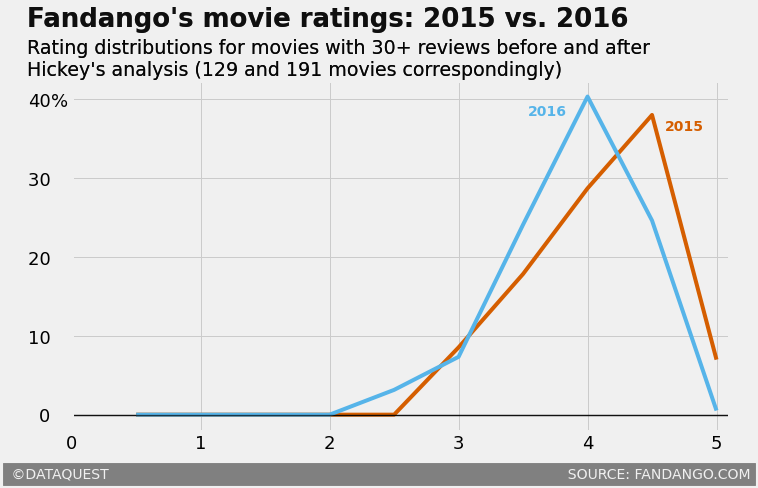

In [278]:
# Selecting the "FiveThirtyEight" style for plotting
plt.style.use('fivethirtyeight')

# Creating a list of colorblind-friendly colors
colors = [[213/255,94/255,0],        # vermillion
          [86/255,180/255,233/255],  # sky blue
          [230/255,159/255,0],       # orange
          [0,158/255,115/255],       # bluish green
          [204/255,121/255,167/255], # reddish purple
          [0,114/255,178/255]]       # blue

# Defining a function for improving plot aesthetics and reproducing the FiveThirtyEight style
def add_plot_aesthetics(ax, y_ticks, y_ticklabels, y_line,
                        x_start, x_end,
                        x_title, y_title, title,
                        x_subtitle, y_subtitle, subtitle,
                        x_signbar, y_signbar, signbar_text):
    ax.tick_params(axis='both', labelsize=18)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticklabels)
    ax.axhline(y_line, color='black', linewidth=1.3, alpha=0.7)
    ax.set_xlim(x_start, x_end)
    ax.text(x_title, y_title, s=title,
            fontsize=26, weight='bold', alpha=0.75)
    ax.text(x_subtitle, y_subtitle, s=subtitle,
            fontsize=19, alpha=0.85)
    ax.text(x_signbar, y_signbar, s=signbar_text,
            fontsize=14, color='#f0f0f0', backgroundcolor='grey')
    return ''

#  Creating plots for comparing the movie rating distribution shapes for 2015 and 2016
fig, ax = plt.subplots(figsize=(10.5,6))

# Creating lists of dataframes, columns with Fandango's ratings, and years
dfs = [fandango_2015, fandango_2016]
columns = ['Fandango_Stars', 'fandango']
labels = ['2015', '2016']

for i in range(len(dfs)):
    
    # Creating a relative frequency table (in %) for given column sorted by rating
    ratings = dfs[i][columns[i]].value_counts(normalize=True).sort_index()*100
    
    # Adding missing unique ratings from 0.5 to 5 (in our case – low ratings) and assigning 0 to their frequencies
    ratings_arranged = pd.Series(ratings, index=np.arange(0.5,5.1,0.5).tolist()).fillna(0)
    
    # Plotting the resulting Series
    ax = ratings_arranged.plot(label=labels[i], c=colors[i])
    
    # Adding plot aesthetics according to the FiveThirtyEight style
    add_plot_aesthetics(ax=ax, y_ticks=(0, 10, 20, 30, 40),
                        y_ticklabels=('0   ', '10   ', '20   ', '30   ', '40%'), y_line=0,
                        x_start=0, x_end=5.1,
                        x_title=-0.35, y_title=49.2,
                        title='Fandango\'s movie ratings: 2015 vs. 2016',
                        x_subtitle=-0.35, y_subtitle=43,
                        subtitle='Rating distributions for movies with 30+ reviews before and after\
                 \nHickey\'s analysis (129 and 191 movies correspondingly)',
                        x_signbar=-0.5, y_signbar=-8,
                        signbar_text=' ©DATAQUEST                                                                                                      SOURCE: FANDANGO.COM')
   
    # Adding annotations to the plots
    ax.text(x=4.6, y=36,
            s='2015',
            color=colors[0],
            weight='bold',
            backgroundcolor='#f0f0f0')
    ax.text(x=3.54, y=38,
            s='2016',
            color=colors[1],
            weight='bold',
            backgroundcolor='#f0f0f0')
plt.show()


## Fandango's actual ratings

I will compile the actual rating of the Fandango system by trying to solve the bug myself

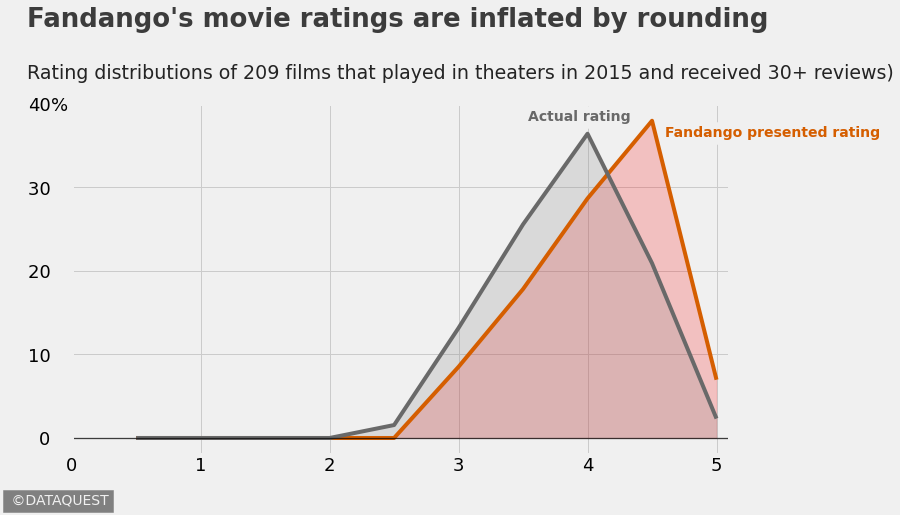

In [279]:
fandango_2015.head()

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(10.5,6))

presented_rating = fandango_2015['Fandango_Stars'].value_counts(normalize= True).sort_index()* 100
actual_rating = fandango_2015_actual_rating.value_counts(normalize= True).sort_index() * 100

presented_rating_arrange = pd.Series(presented_rating, index= np.arange(0.5, 5.1, 0.5).tolist()).fillna(0)
actual_rating_arrange = pd.Series(actual_rating, index= np.arange(0.5,5.1,0.5).tolist()).fillna(0)

ax = presented_rating_arrange.plot(label= 'Fandango presented rating', c= colors[0])
ax = actual_rating_arrange.plot(label= 'Actual rating', c= 'dimgrey')

ax.text(x=4.6, y=36,
        s='Fandango presented rating',
        color=colors[0],
        weight='bold',
        backgroundcolor='#f0f0f0')
ax.text(x=3.54, y=38,
        s='Actual rating',
        color= 'dimgrey',
        weight='bold',
        backgroundcolor='#f0f0f0')

ax.fill_between(presented_rating_arrange.index.tolist(), presented_rating_arrange.tolist(), alpha=0.2, color='red')
ax.fill_between(actual_rating_arrange.index.tolist(), actual_rating_arrange.tolist(), alpha=0.2, color='grey')

add_plot_aesthetics(ax=ax, y_ticks=(0, 10, 20, 30, 40),
                y_ticklabels=('0   ', '10   ', '20   ', '30   ', '40%'), y_line=0,
                x_start=0, x_end=5.1,
                x_title=-0.35, y_title=49.2,
                title='Fandango\'s movie ratings are inflated by rounding',
                x_subtitle=-0.35, y_subtitle=43,
                subtitle='Rating distributions of 209 films that played in theaters in 2015 and received 30+ reviews)',
                x_signbar=-0.5, y_signbar=-8,
                signbar_text=' ©DATAQUEST')


plt.show()

## KL Divergence - Measuring the distance between the Gaussian distributions

Using a KL divergence formula, I will measure the difference between the Gaussian distributions of Fandango plotted above.

In [323]:
from math import log
from scipy.stats import norm

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))


fandango_2015_ratings = fandango_2015['Fandango_Stars'].value_counts(normalize= True).sort_index()
fandango_2015_ratings_aranged = pd.Series(fandango_2015_ratings, np.arange(0.5, 5.1, 0.5).tolist()).fillna(0.0001)

fandango_2016_ratings = fandango_2016['fandango'].value_counts(normalize=True).sort_index()
fandango_2016_ratings_aranged = pd.Series(fandango_2016_ratings, np.arange(0.5, 5.1, 0.5).tolist()).fillna(0.0001)

# calculating P||Q
kl_pq = kl_divergence(fandango_2015_ratings_aranged, fandango_2016_ratings_aranged)
print('KL(P || Q): %.3f nats' %kl_pq)


# Calculating Q||P with the modified function because the function above returns infinite. Is this even correct?

kl_qp = kl_divergence(fandango_2016_ratings_aranged, fandango_2015_ratings_aranged)

print('KL(Q || P): %.2f nats' %kl_qp)



KL(P || Q): 0.207 nats
KL(Q || P): 0.26 nats


In [281]:
# calclating Q||P 
from scipy.special import rel_entr

sum(rel_entr(fandango_2016_ratings_aranged, fandango_2015_ratings_aranged))

inf

In [ ]:
# plt.style.use('fivethirtyeight')

# fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,6))
# fandango_2016['fandango'].plot.kde(label='2016', legend= True)

# plt.title("Comparing distribution shapes for Fandango movie ratings 2015 vs 2016", y= 1.02)
# plt.xlabel("Stars")
# plt.xlim(0,5)
# plt.xticks(np.arange(0,5.1,0.5))

# plt.show()

By looking at the graph, we conclude the following:
- Both lines are left skewed
- The 2016 line has a tendency towards the left in comparison to 2015

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies



In [ ]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
#                                 # avoid silly mistakes as we read to and from
fandango_2015['Fandango_Stars'].value_counts(normalize= True).sort_index(ascending= False) * 100
# print(tabulate(round(fandango_2015['Fandango_Stars'].value_counts(normalize = True)
#                .sort_index(ascending=False) * 100).to_frame(),
#               headers=['Rating', 'Frequency'],
#               tablefmt= 'orgtbl'), 2*'\n')

In [ ]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index(ascending=False) * 100



In 2016, the 4.5 and 5 stars ratings have significantly decreased in comparison to 2015. This can be seen that 5 stars movies in 2016 were under 1% vs almost 7% in 2015.

Also, there is a new lower low rating in 2016 by adding the 2.5 rating which accounted to 3% of the movies.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determining the direction of the change

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [ ]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['Mean', 'Median', 'Mode']
summary



In [ ]:
# using a for loop to automatically write the mean, meadian and mode

rating_columns= [fandango_2015['Fandango_Stars'],
                fandango_2016['fandango']]

list_sum_stats = []
for item in rating_columns:
    lst= [item.mean(),
         item.median(),
         item.mode()[0]]
    list_sum_stats.append(lst)
    
# Creating a dataframe from the list of summary statistics

summary = pd.DataFrame(list_sum_stats, columns=['Mean', 'Median', 'Mode'], index=['2015', '2016'])

print(summary)

# Create s grouped bar plot for the summary statistics
fig = plt.subplots(figsize=(10.5,6))

ax= summary.loc['2015'].plot.bar(color=colors[2],
                                align= 'center',
                                label= '2015',
                                width= 0.3)
ax = summary.loc['2016'].plot.bar(color= colors[3],
                                 align= 'edge',
                                 label= '2016',
                                 width= 0.3,
                                 rot= 0)

# Using the previous created function to add aesthetics to the graph

add_plot_aesthetics(ax= ax, y_ticks= np.arange(0, 5.1, 0.5),
                   y_ticklabels= np.arange(0, 5.1, 0.5).tolist(), y_line= 0.03,
                   x_start= -0.3, x_end= 2.5,
                   x_title= -0.3, y_title= 6,
                   title= 'Comparing Fandango\'s summary statistics: 2015 vs 2016',
                   x_subtitle= -0.3, y_subtitle= 5.6,
                   subtitle= 'Mean, median and mode comparison for both datasets',
                   x_signbar= -0.3, y_signbar= -0.7,
                   signbar_text= '©DATAQUEST')

# Adding case specific plot aesthetics
ax.set_ylim(0, 5.5)
ax.legend(frameon= 0.0, loc='upper center', fontsize= 15)

plt.show()

In [ ]:
# plt.style.use('fivethirtyeight')
# summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
# summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
#                          rot = 0, figsize = (8,5))

# plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
# plt.ylim(0,5.5)
# plt.yticks(np.arange(0,5ndang.1,.5))
# plt.ylabel('Stars')
# plt.legend(framealpha = 0, loc = 'upper center')
# plt.show()

In [ ]:
(summary['Mean'][0] - summary['Mean'][1]) / summary['Mean'][0]

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Comparing Different Movie Aggregators

In order to understand the overall, it is important to compare Fandango with the other movie aggregators after the changes have been made. In this way, we will see how different is Fandango from the other aggregators aftter the changes have been made.

Also, let's we can check to see movie aggregator is more reliable.

We will showcase the data from both years separately. In each of the case, we will use the ratings **normalized to Fandango's rating style (5-point scale)** and rounded to the **nearest** half-star, to caveat for Fandango's bug.

In [ ]:
# Defining a function for plotting different aggregator distrubutions

def plot_aggregator_distributions(df, columns, n_plots, column_fandango,
                                 year, n_films,
                                 x_annotations, y_annotations,
                                 n_arrows, x_arrow, y_arrow, dx_arrow, dy_arrow):
    fig, ax = plt.subplots(figsize=(10.5,6))
    labels = ['Fandango', 'IMDB', 'Rotten \nTomatoes', 'Rotten \nTomatoes \n- users', 
              'Metacritic', 'Metacritic \n- users']
    
    for i in range(n_plots):
        # Create a relating frequency table (%) for given column sorted by rating
        ratings= df[columns[i]].value_counts(normalize= True).sort_index() * 100
        
        # Plotting the resulting Series
        ax = ratings.plot(linewidth= 2.5, c= colors[i])
        
        # Filling the area under the plots with colors,
        if columns[i] == column_fandango:
            ax.fill_between(ratings.index.tolist(), ratings.tolist(), alpha=0.2, color='red')
        ax.fill_between(ratings.index.tolist(), ratings.tolist(), alpha=0.2, color='grey')
        
        # Adding annotations to each graph
        ax.text(x= x_annotations[i], y= y_annotations[i],
               s= labels[i], color= colors[i],
               weight='bold', backgroundcolor= '#f0f0f0')
        
    # Adding plot aesthetics
    add_plot_aesthetics(ax, y_ticks=(0, 10, 20, 30, 40),
                       y_ticklabels= ('0   ', '10   ', '20   ', '30   ', '40% '), y_line= 0,
                       x_start= -0.02, x_end= 5.02,
                       x_title= -0.36, y_title= 49.2,
                       title= f'Fandango vs. other rating aggregators in {year}',
                       x_subtitle= -0.36, y_subtitle= 43,
                       subtitle= f'Nornalized rating distributions of {n_films} receveid 30+ fan reviews on \nFandango.com"',
                        x_signbar= -0.5, y_signbar= -8,
                        signbar_text= ' ©DATAQUEST\
                                        SOURCE: FANDANGO.COM, IMDB, METACRITIC, ROTTEN TOMATOES')
    
    # Adding pointers to the overlapped graphs
    for j in range(n_arrows):
        ax.arrow(x= x_arrow[j], y= y_arrow[j],
                dx= dx_arrow[j], dy= dy_arrow[j],
                width= 0.005, fc= 'k', ec= 'k')
    
    plt.show()
    return ''

# Plotting different aggregator distributions for 2015

plot_aggregator_distributions(df=fandango_score_comparison,
                              columns=['Fandango_Stars', 'IMDB_norm_round', 'RT_norm_round',
                                       'RT_user_norm_round', 'Metacritic_norm_round',
                                       'Metacritic_user_norm_round'],
                              n_plots=6, column_fandango='Fandango_Stars',
                              year=2015, n_films = 129,
                              x_annotations=[4.2, 3, 0.5, 2.1, 1.15, 2.34],
                              y_annotations=[39.5, 38.5, 12.3, 18.6, 16.5, 27.15],
                              n_arrows=2, x_arrow=[3,2.3], y_arrow=[29.7,18],
                              dx_arrow=[0.3,0], dy_arrow=[-4,-5])


# Plotting different aggregator distrubutions for 2016
plot_aggregator_distributions(df=fandango_movie_ratings,
                              columns=['fandango', 'nr_imdb', 'nr_tmeter', 'nr_audience',
                                       'nr_metascore'],
                              n_plots=5, column_fandango='fandango',
                              year=2016, n_films = 191,
                              x_annotations=[4.15, 3, 0.1, 1, 1.9],
                              y_annotations=[38.7, 38.5, 10, 16, 20],
                              n_arrows=1, x_arrow=[1.5], y_arrow=[15],
                              dx_arrow=[0.3], dy_arrow=[-3])
plt.show()
        
    

The graphs show us that Fandango's score are still significantly different compared to the other movie aggergators even after presumably solving the bug. In 2016, Fandango's distribution shifted a bit to the left, becoming less skewed and introducing a new rating, the **2.5**\*. Even so, in comparison to the other aggregators, it is very unrealistic for Fandango to have higher ratings and therefore, deeming it an unreliable source for movie ratings.
*It is to be reminded that Fandango is also selling tickets to movie on their website.*

By looking at the graph, it can be concluded that Metacritic is a more reliable source of movie ratings given the fact that it's shape resembles a *normal distribution* better than the other ones (**??**)

## Summary aggregators

In [ ]:
def plot_aggregator_stats (df, columns, labels, year):
    list_sum_stat = []
    rating_columns = []
    for i in range(len(columns)):
        rating_columns.append(df[columns[i]])
        lst = [labels[i],
               round(rating_columns[i].mean(),2),
               rating_columns[i].median(),
               rating_columns[i].mode().loc[0]]
        list_sum_stat.append(lst)
    
    # Create a dataframe from the list with the summary statistics
    df_sum_stat = pd.DataFrame(list_sum_stat, columns= ['Aggregator', 'Mean', 'Median', 'Mode'])
    
    # Printing the summary statistics as a table
    print(df_sum_stat.value_counts(normalize= True).sort_index()*100)
    print('\n')
    
    # Melting the dataframe for futher plotting
    melted = pd.melt(df_sum_stat, id_vars=['Aggregator'], value_vars=['Mean', 'Median', 'Mode'])
   # print(melted)
    
    # Creating the plot
    fig, ax= plt.subplots(figsize=(10.5, 6))
    ax= sns.stripplot(x= 'variable', y= 'value', hue= 'Aggregator',
                     s= 15, alpha= 0.7, data= melted)
    
    # Adding plot aesthethics
    add_plot_aesthetics(ax, y_ticks= np.arange(0, 5.1, 0.5), y_ticklabels= np.arange(0, 5.1, 0.5).tolist(),
                       y_line= 2.51,
                       x_start= -0.332, x_end= 2.4,
                       x_title= -0.332, y_title= 4.87,
                       title= f'Summary statistics for all aggreators in {year}',
                       x_subtitle= -0.332, y_subtitle= 4.7,
                       subtitle= 'Mean, median and more comparison',
                       x_signbar= 0.5, y_signbar= 1.84,
                       signbar_text= '  ©DATAQUEST\
                                       SOURCE: FANDANGO.COM, IMDB, METACRITIC, ROTTEN TOMATOES')
    
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ax.set_ylim(2.5, 4.6)
    ax.legend(fontsize= 14, bbox_to_anchor= (0.876, -0.08), ncol= 3)
    
    plt.show()
    return ''

# Plotting the summary statistics for different aggregators in 2015
plot_aggregator_stats(df= fandango_score_comparison,
                     columns= ['Fandango_Stars', 'IMDB_norm_round', 'RT_norm_round', 'RT_user_norm_round', 
                               'Metacritic_norm_round', 'Metacritic_user_norm_round'],
                     labels= ['Fandango', 'IMDB', 'Rotten Tomatoes', 'Rotten Tomatoes - users', 'Metacritic',
                             'Metacritic - users'],
                     year= 2015)
    
# Plotting the summary stats for different aggregators in 2016
plot_aggregator_stats(df= fandango_movie_ratings,
                     columns= ['fandango', 'nr_imdb', 'nr_tmeter', 'nr_audience', 'nr_metascore'],
                      labels= ['Fandango', 'IMDB', 'Rotten Tomatoes', 'Rotten Tomatoes - users', 'Metacritic'],
                      year= 2016)

plt.show()

This brings more evident that Fandango still has higher stats than other aggregators both in 2015 and 2016 with the exception of Rotten Tomatoes where it had a higher mode

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.